Sudoku Data Exploration

In [21]:
import sudoku_solving_algorithms as solvers
import pandas as pd
import seaborn as sns

In [23]:
filepath = r'D:/code/github/games/sudoku/benchmarks/'
freeman_df = pd.read_csv(f'{filepath}freeman_results.csv')
hardest_df = pd.read_csv(f'{filepath}hardest_results.csv')

In [17]:
freeman_df

,description,input,output,bf_time,lbf_time,strat_time,bf_loops,lbf_loops,strat_lbf_loops,ns_count,hs_count,nd_count,hd_count,nt_count,ht_count,nq_count,hq_count,r_count
0,Naked Double,4000009380320941000953002403706090045290016736...,4615729387328941568953162473786295145294816736...,0.017994,0.015995,0.077974,4485,1656,0,34,3,2,0,0,0,0,0,0
1,Hidden Double,0000000009046070000768041003097010807080003010...,5832194679146378252768541393497215867289653416...,0.109966,0.053976,0.180942,26787,10929,0,46,1,0,7,0,0,0,0,0
2,Naked Triple,0000000000019005005603100901006000280040007002...,9285473164319865725673128941956734283842517692...,0.940698,0.457855,0.307889,235300,109463,0,45,10,7,0,2,0,0,0,0
3,Hidden Triple,3000000009700100006005830002000009005006210030...,3819765249752146386425831792643589175976214831...,0.319913,0.154950,0.510837,79607,36237,0,41,15,0,5,7,6,0,0,0
4,Naked Quad,0000300860000200000000085003710000949000000054...,1425397865876219436934785213718562949681423754...,0.178928,0.108984,0.277910,47079,20409,0,40,17,0,0,0,2,6,0,0
5,Hidden Quad,0005000004250900018000100205000000000190004600...,9715823464256937818637145295421369783192784656...,3.538872,1.765434,0.784753,971865,495737,21980,7,8,21,0,0,0,0,13,2
6,Pointing Pair,0109036000000800009000005070020104300004020000...,4179536822561879439832465178725194365394628711...,0.145952,0.075958,0.408868,36442,16649,6084,1,9,3,7,0,0,0,0,6
7,Box Line Reduction,0160078030008000000700010600480003006000000020...,4165278935928361478734912651482653796573194822...,0.294902,0.147952,0.489845,78721,36596,268,10,13,0,0,0,0,0,0,14
8,Worlds Hardest Sudoku,8000000000036000000700902000500070000000457000...,8127536499436821756754912831542378963698457212...,1.773431,0.912709,1.017674,495276,241003,241003,0,0,0,0,0,0,0,0,0


In [18]:
freeman_df.describe()

,bf_time,lbf_time,strat_time,bf_loops,lbf_loops,strat_lbf_loops,ns_count,hs_count,nd_count,hd_count,nt_count,ht_count,nq_count,hq_count,r_count
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.813406,0.410424,0.450744,219506.888889,107631.000000,29926.111111,24.888889,8.444444,3.666667,2.111111,1.000000,0.888889,0.666667,1.444444,2.444444
std,1.164794,0.582034,0.296204,321782.709383,163946.701454,79484.671598,19.852232,6.085045,6.910137,3.218868,2.345208,2.027588,2.000000,4.333333,4.772607
min,0.017994,0.015995,0.077974,4485.000000,1656.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145952,0.075958,0.277910,36442.000000,16649.000000,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.294902,0.147952,0.408868,78721.000000,36237.000000,0.000000,34.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.940698,0.457855,0.510837,235300.000000,109463.000000,6084.000000,41.000000,13.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3.538872,1.765434,1.017674,971865.000000,495737.000000,241003.000000,46.000000,17.000000,21.000000,7.000000,7.000000,6.000000,6.000000,13.000000,14.000000


In [5]:
# sns.distplot()

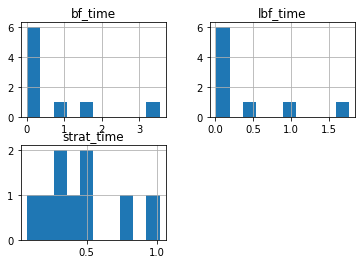

In [20]:
# for column in ['bf_time', 'lbf_time', 'solve_time']:
freeman_df[['bf_time', 'lbf_time', 'strat_time']].hist(bins=10);

In [24]:
hardest_df

,description,input,output,bf_time,lbf_time,strat_time,bf_loops,lbf_loops,strat_lbf_loops,ns_count,hs_count,nd_count,hd_count,nt_count,ht_count,nq_count,hq_count,r_count
0,NaN,0000000080030004000900200600000790000000612000...,6219437587836154925947283611428796353574612898...,70.372577,33.920660,34.555608,16863760,8118435,8101854,0,1,0,0,0,0,0,0,0
1,NaN,0000000020080109005000030400001093000600300800...,6398475124785129635126937487241893569652341871...,9.365834,4.524065,4.647948,2026783,1016240,1010218,0,1,0,0,0,0,0,0,0
2,NaN,0020007000100000605000000180000370000000490000...,8324167954179852635962734189518376243286495717...,48.021450,22.997656,14.410033,10796387,5419642,3191420,0,1,0,0,0,0,0,0,2
3,NaN,0000000070040206008000003100000029000400900300...,9638145271543276898279653143714829566457918322...,99.375133,49.573340,49.926020,21992072,10836590,10836590,0,0,0,0,0,0,0,0,0
4,NaN,0040030000700800002081000060030000900800200001...,5942638716715843292381975467634182959853267141...,6.646059,3.457991,2.604976,1532235,793544,535098,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,NaN,1004000090560090000000100600600008005000040909...,1234567894567891237982135642641978355318246979...,0.029990,0.033009,0.077972,6713,3296,2609,0,1,0,0,0,0,0,0,0
371,NaN,1000007000060801000890000060000040506005900019...,1234567894567891327891325462186749536345982719...,0.018995,0.023994,0.076977,4575,2191,2178,0,1,0,0,0,0,0,0,0
372,NaN,1000007800060801000090000060000040506005900019...,1234567894567891327891325462186749536345982719...,0.018977,0.023996,0.077974,4585,2203,2178,0,1,0,0,0,0,0,0,0
373,NaN,1203000004050006000700000206001003000045300000...,1283967544952716383768459216891243757145398622...,6.948784,3.183984,3.478890,1791689,802106,798566,0,0,0,0,0,0,0,0,6


In [25]:
hardest_df.describe()

,description,bf_time,lbf_time,strat_time,bf_loops,lbf_loops,strat_lbf_loops,ns_count,hs_count,nd_count,hd_count,nt_count,ht_count,nq_count,hq_count,r_count
count,0.0,375.000000,375.000000,375.000000,3.750000e+02,3.750000e+02,3.750000e+02,375.0,375.000000,375.000000,375.000000,375.0,375.000000,375.0,375.0,375.000000
mean,NaN,14.607194,7.584265,6.869147,3.523319e+06,1.832922e+06,1.615387e+06,0.0,0.509333,0.005333,0.208000,0.0,0.024000,0.0,0.0,1.840000
std,NaN,82.198620,42.776200,42.886241,1.922741e+07,1.008824e+07,9.937625e+06,0.0,0.793889,0.103280,1.089296,0.0,0.464758,0.0,0.0,2.012262
min,NaN,0.001985,0.015981,0.051968,4.470000e+02,2.290000e+02,2.280000e+02,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
25%,NaN,0.015996,0.024983,0.137957,3.989000e+03,2.027000e+03,1.590000e+03,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
50%,NaN,0.072976,0.054005,0.228929,1.800100e+04,9.066000e+03,7.887000e+03,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000
75%,NaN,6.491233,3.159985,2.871381,1.458448e+06,7.138085e+05,6.396110e+05,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,4.000000
max,NaN,1523.239117,793.772146,807.816313,3.547032e+08,1.865648e+08,1.865648e+08,0.0,4.000000,2.000000,8.000000,0.0,9.000000,0.0,0.0,9.000000
